In [1]:
import numpy as np 
import pandas as pd
import os
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,query,pair,f_cid3,f_brand,f_ctf,f_ctf_cofidence,f_rf,f_icf,f_icf_confidence,f_icf_max,...,b_brand,b_ctf,b_ctf_cofidence,b_rf,b_icf,b_icf_confidence,b_icf_max,b_igm,b_entropy,label
0,工控一体机电脑,"[""工控"",""一体机""]",12798,0,0.089458,0.633673,3.379758,2.883063,2.825473,2.542133,...,0,1.461409,0.945565,4.503264,1.755967,1.566330,1.416464,0.000693,48.610466,0
1,工控一体机电脑,"[""工控"",""电脑""]",12798,0,0.089458,0.633673,3.379758,2.883063,2.825473,2.542133,...,0,1.413284,0.688966,4.009263,1.242405,0.901759,0.903178,0.000363,78.061700,0
2,工控一体机电脑,"[""一体机"",""电脑""]",12798,0,1.461409,0.945565,4.503264,1.755967,1.566330,1.416464,...,0,1.413284,0.688966,4.009263,1.242405,0.901759,0.903178,0.000363,78.061700,1
3,巧束卫生巾,"[""巧束"",""卫生巾""]",16800,0,0.006568,0.726057,2.908800,6.269570,6.267675,5.870127,...,0,1.265068,0.981131,6.495395,3.243066,3.203239,2.901222,0.019641,3.472029,1
4,巴拿马100纪念酒,"[""巴拿马"",""100""]",9435,0,0.001675,0.063293,2.983968,3.286416,3.248312,2.944439,...,0,0.002721,0.002883,1.095731,0.406649,-0.689600,0.067654,0.000007,414.643300,1


In [3]:
df.columns

Index(['query', 'pair', 'f_cid3', 'f_brand', 'f_ctf', 'f_ctf_cofidence',
       'f_rf', 'f_icf', 'f_icf_confidence', 'f_icf_max', 'f_igm', 'f_entropy',
       'b_cid3', 'b_brand', 'b_ctf', 'b_ctf_cofidence', 'b_rf', 'b_icf',
       'b_icf_confidence', 'b_icf_max', 'b_igm', 'b_entropy', 'label'],
      dtype='object')

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.f_ctf.describe()

count   93302.00
mean        0.27
std         0.42
min         0.00
25%         0.01
50%         0.05
75%         0.36
max         3.43
Name: f_ctf, dtype: float64

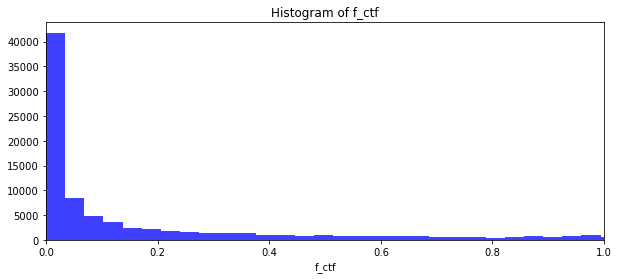

In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
plt.figure(figsize = (10, 4))
n, bins, patches = plt.hist(df['f_ctf'], 100, facecolor='blue', alpha=0.75)
plt.xlabel('f_ctf')
plt.xlim(0, 1)
plt.title('Histogram of f_ctf')
plt.show();

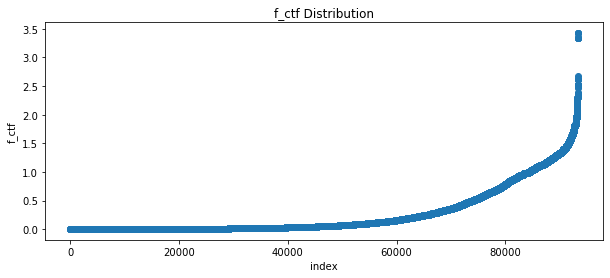

In [6]:
plt.figure(figsize = (10, 4))
plt.scatter(range(df.shape[0]), np.sort(df['f_ctf'].values))
plt.xlabel('index')
plt.ylabel('f_ctf')
plt.title("f_ctf Distribution")
plt.show();

In [7]:
df.drop(['query', 'pair'],axis=1, inplace=True)
df.columns

Index(['f_cid3', 'f_brand', 'f_ctf', 'f_ctf_cofidence', 'f_rf', 'f_icf',
       'f_icf_confidence', 'f_icf_max', 'f_igm', 'f_entropy', 'b_cid3',
       'b_brand', 'b_ctf', 'b_ctf_cofidence', 'b_rf', 'b_icf',
       'b_icf_confidence', 'b_icf_max', 'b_igm', 'b_entropy', 'label'],
      dtype='object')

In [8]:
categorical=['f_cid3','f_brand','b_cid3','b_brand']

In [9]:
X = df.drop('label', axis=1)
y = df.label

In [10]:
# Prepare Categorical features indices
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols, query_cols, sorter=sidx)]


categorical_features_indices = column_index(X, categorical)

In [11]:
categorical_features_indices

array([ 0,  1, 10, 11])

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [14]:
model =  CatBoostClassifier(iterations=700,
                             learning_rate=0.01,
                             depth=15,
                             eval_metric='AUC',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             loss_function='Logloss',
                             od_wait=100)
model.fit(X_train, y_train,
                 eval_set=(X_valid, y_valid),
                 cat_features=categorical_features_indices,
                 use_best_model=True,
                 plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9314067	best: 0.9314067 (0)	total: 2.81s	remaining: 32m 48s
75:	test: 0.9542982	best: 0.9543035 (74)	total: 3m 18s	remaining: 27m 10s
150:	test: 0.9570179	best: 0.9570179 (150)	total: 6m 38s	remaining: 24m 9s
225:	test: 0.9583704	best: 0.9583717 (224)	total: 9m 58s	remaining: 20m 56s
300:	test: 0.9592288	best: 0.9592288 (300)	total: 13m 10s	remaining: 17m 27s
375:	test: 0.9598606	best: 0.9598606 (375)	total: 16m 21s	remaining: 14m 5s
450:	test: 0.9604364	best: 0.9604364 (450)	total: 19m 39s	remaining: 10m 50s
525:	test: 0.9608340	best: 0.9608346 (523)	total: 22m 52s	remaining: 7m 34s
600:	test: 0.9611737	best: 0.9611737 (600)	total: 25m 53s	remaining: 4m 15s
675:	test: 0.9614665	best: 0.9614665 (675)	total: 29m 3s	remaining: 1m 1s
699:	test: 0.9615581	best: 0.9615621 (698)	total: 30m 8s	remaining: 0us

bestTest = 0.9615621288
bestIteration = 698

Shrink model to first 699 iterations.


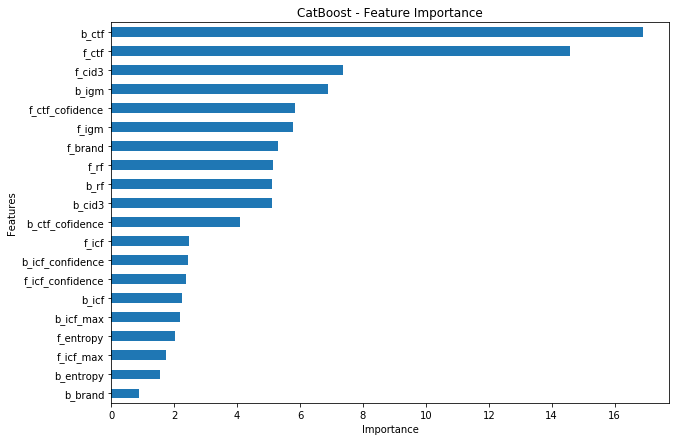

In [15]:
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [16]:
fea_imp

,imp,col
11,0.87,b_brand
19,1.54,b_entropy
7,1.74,f_icf_max
9,2.03,f_entropy
17,2.19,b_icf_max
15,2.24,b_icf
6,2.38,f_icf_confidence
16,2.43,b_icf_confidence
5,2.47,f_icf
13,4.09,b_ctf_cofidence


In [17]:
from catboost import CatBoostRanker, Pool, MetricVisualizer